# Project by KAJAL NAWIK

# E-Commerce Customer Segmentation and Prediction Project
- Project background and context
    - An international e-commerce company wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers.

# Step 1: Perform Exploratory Analysis on the Dataset
Exploratory Data Analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

Steps to Perform EDA are as follows:

- Exploratory Data Analysis (EDA): Analyze the data to understand customer purchasing patterns.
- Conduct descriptive statistics on the dataset. (count, mean, standard deviation, min, max, 25%, 50%, 75% percentile, datatype)
- Data Preprocessing: Handle missing values, normalize features, and prepare the data for modeling.
- Perform feature engineering by creating a new column. (Adjustments in the dataset for meaningful insights)
- Analyze the correlation between the data fields. (Discover relationships and dependencies between variables)
- Customer Segmentation: Use clustering techniques (e.g., K-means) to segment customers based on Recency, Frequency, and Monetary (RFM) analysis.
- Predictive Classification Model: Build a classifier to predict customer categories.
- Treat outlier (Drastically deviating factors)
- Visualization: Create an interactive dashboard/report for insights.

# 1. Load the Dataset

In [36]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [38]:
# load the dataset
data = data = pd.read_csv('Downloads/data.csv', encoding='latin1')

In [40]:
data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

# 2. Data Cleaning and Preprocessing

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [45]:
data.shape

(541909, 8)

In [47]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [49]:
# drop missing values as appropriate
data = data.dropna()  

In [51]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [53]:
data.shape

(406829, 8)

After dropping the null values the shape of the data reduced to 406829 from 541909

In [56]:
duplicates = data.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 406829, dtype: bool


There are no duplicate rows in the DataFrame.

In [59]:
data.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [61]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [63]:
# Identify categorical and continuous columns based on data types and semantics

In [65]:
# Categorical data: Columns with object data types or those with discrete, non-numeric values
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [67]:
# Continuous data: Numeric columns with meaningful ranges of values
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [69]:
print(categorical_columns)
print(numeric_columns)

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
['Quantity', 'UnitPrice', 'CustomerID']


# 3. Feature engineering

In [72]:
# Convert InvoiceDate column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'] 

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [73]:
# Extract year, month, day, and time from the InvoiceDate column
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour

In [76]:
# Display the updated DataFrame with new columns
data[['InvoiceDate', 'Year', 'Month', 'Day', 'Hour']].head()

InvoiceDate  Year  Month  Day  Hour
0 2010-12-01 08:26:00  2010     12    1     8
1 2010-12-01 08:26:00  2010     12    1     8
2 2010-12-01 08:26:00  2010     12    1     8
3 2010-12-01 08:26:00  2010     12    1     8
4 2010-12-01 08:26:00  2010     12    1     8

In [78]:
# Convert 'InvoiceDate' to datetime format (if not already)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Extract the date part only
data['InvoiceDate'] = data['InvoiceDate'].dt.date

# Verify the changes
print(data['InvoiceDate'].head())

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: InvoiceDate, dtype: object


In [80]:
# Convert 'InvoiceDate' to datetime, errors='coerce' will turn invalid dates to NaT
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Extract only the Year-Month (format YYYY-MM)
data['Year-Month'] = data['InvoiceDate'].dt.strftime('%Y-%m')

# Verify the result
print(data[['InvoiceDate', 'Year-Month']])

       InvoiceDate Year-Month
0       2010-12-01    2010-12
1       2010-12-01    2010-12
2       2010-12-01    2010-12
3       2010-12-01    2010-12
4       2010-12-01    2010-12
...            ...        ...
541904  2011-12-09    2011-12
541905  2011-12-09    2011-12
541906  2011-12-09    2011-12
541907  2011-12-09    2011-12
541908  2011-12-09    2011-12

[406829 rows x 2 columns]


In [81]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Day            0
Hour           0
Year-Month     0
dtype: int64

In [82]:
# create a new column for the total price 
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 406829, dtype: float64

In [83]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  Day  Hour  \
0  2010-12-01       2.55     17850.0  United Kingdom  2010     12    1     8   
1  2010-12-01       3.39     17850.0  United Kingdom  2010     12    1     8   
2  2010-12-01       2.75     17850.0  United Kingdom  2010     12    1     8   
3  2010-12-01       3.39     17850.0  United Kingdom  2010     12    1     8   
4  2010-12-01       3.39     17850.0  United Kingdom  2010     12    1     8   

  Year-Month  TotalPrice  
0    2010-12       15.30  
1    2010-12       20.34  
2    2010-12       22.00  
3    2010-12       20.34  
4    2010-12       20.34

# 4. Perform Exploratory Data Analysis (EDA)

Histogram for number of purchases

In [90]:
# Count the number of purchases for each month
monthly_purchases = data.groupby('Year-Month').size()

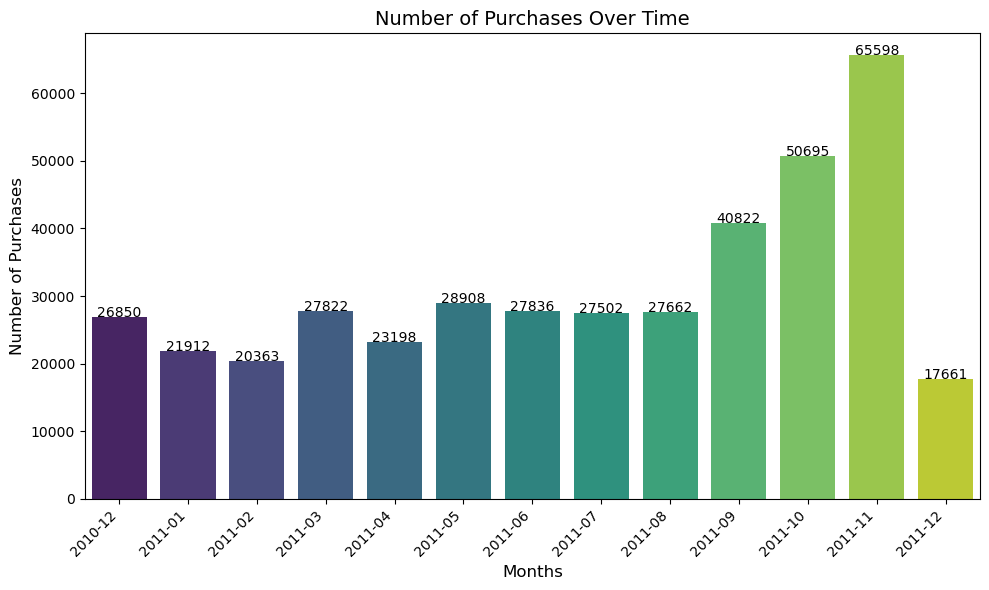

In [92]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_purchases.index, y=monthly_purchases.values, palette='viridis')

# Add labels and title
plt.xlabel('Months', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.title('Number of Purchases Over Time', fontsize=14)

# Rotate x-axis labels and add counts above bars
plt.xticks(rotation=45, ha='right', fontsize=10)
for i, count in enumerate(monthly_purchases.values):
    plt.text(x=i, y=count + 5, s=f'{count}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

- Number of Purchases Over Time
  - A bar chart shows the monthly purchase count over time.
  - The period with the highest purchases is November 2011 (65,598 purchases), followed by October 2011 (50,695).
  - There’s a clear seasonality, with higher purchases toward the end of the year (likely due to holiday demand).
  - The lowest number of purchases occurred in January 2011 (21,912) and February 2011 (20,363).

Histogram for quantity sold per product

In [96]:
# Group by product and calculate total quantity sold
product_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

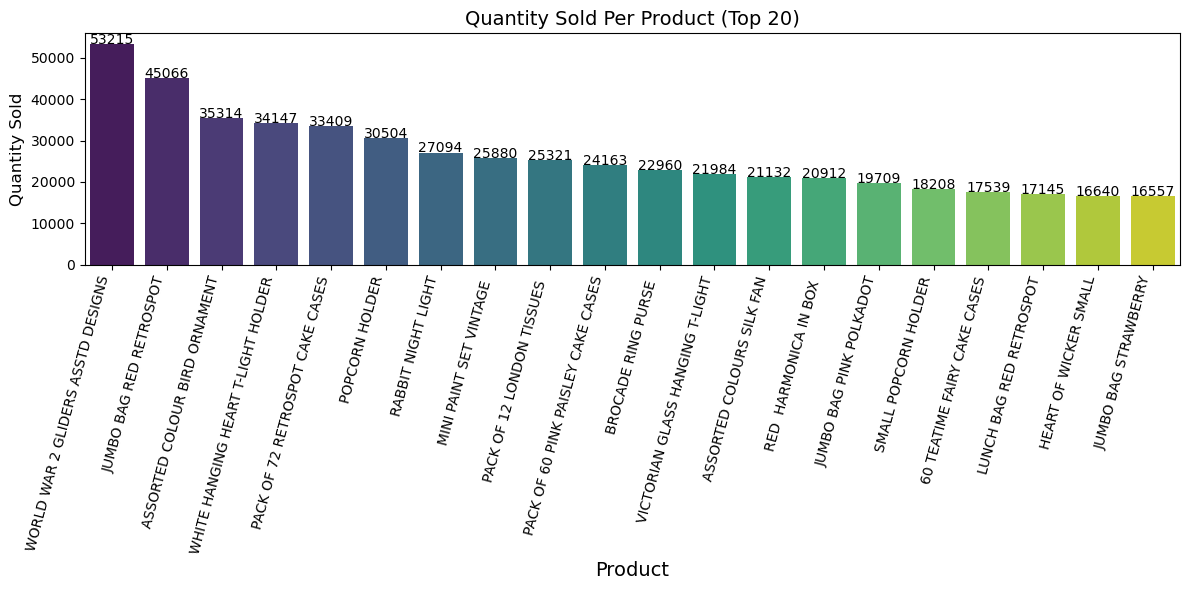

In [98]:
# Plot the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x=product_quantity.index[:20], y=product_quantity.values[:20], palette='viridis')  # Top 20 products
plt.xlabel('Product', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=12)
plt.title('Quantity Sold Per Product (Top 20)', fontsize=14)
plt.xticks(rotation=75, ha='right', fontsize=10)
for i, count in enumerate(product_quantity.values[:20]):
    plt.text(x=i, y=count + 10, s=f'{count}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

- Quantity Sold Per Product (Top 20)
  - Displays a bar chart of the top 20 products by quantity sold.
  - The top product, "World War 2 Gliders Asstd Designs", leads significantly with 53,215 units sold.
  - Other high-ranking products include "Jumbo Bag Red Retrospot" (45,066 units) and "Assorted Colour Bird Ornament" (35,314 units).
  - The distribution shows a sharp drop-off after the top products, with the 20th product, "Jumbo Bag Strawberry", selling 16,557 units.

In [101]:
# Group by country and calculate metrics
country_behavior = data.groupby('Country').agg(
    num_customers=('CustomerID', 'nunique'),
    total_spending=('TotalPrice', 'sum'),
    average_spending=('TotalPrice', 'mean')
).reset_index()

In [103]:
# Sort countries by total spending
country_spending_sorted = country_behavior.sort_values(by='total_spending', ascending=False)

# Top 20 countries by total spending
top_20_spending = country_spending_sorted.head(20)

# Bottom 20 countries by total spending
lowest_20_spending = country_spending_sorted.tail(20)

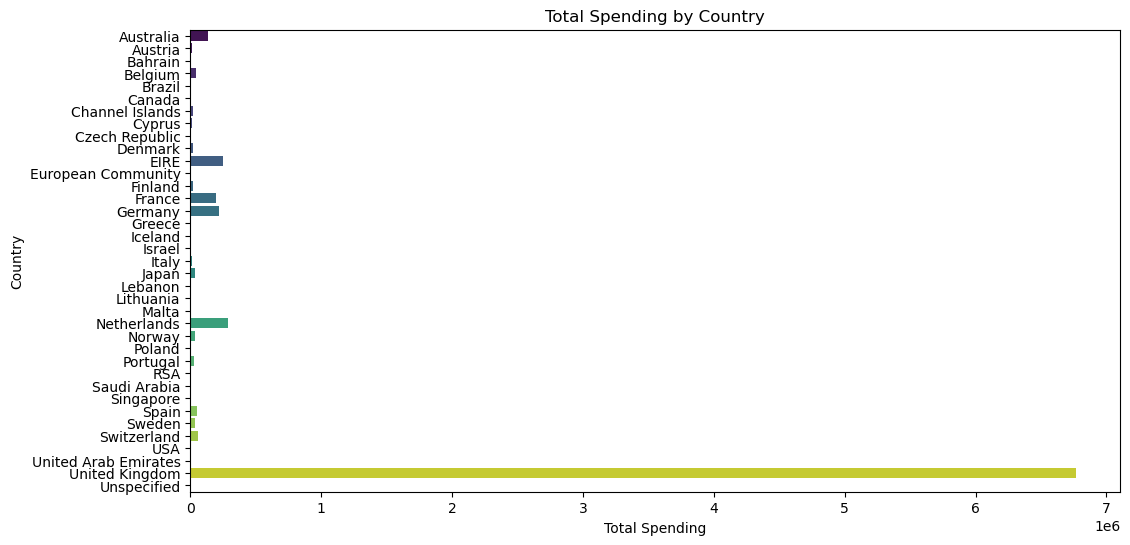

In [105]:
# Plot the total spending by country
plt.figure(figsize=(12, 6))
sns.barplot(x='total_spending', y='Country', data=country_behavior, palette='viridis')
plt.title('Total Spending by Country')
plt.xlabel('Total Spending')
plt.ylabel('Country')
plt.show()

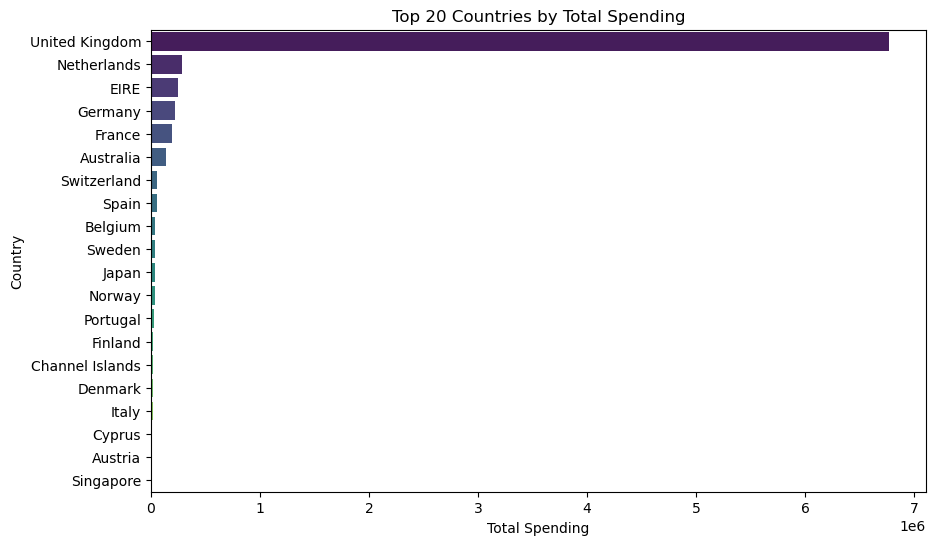

In [106]:
# Plotting Top 20 Spending
plt.figure(figsize=(10, 6))
sns.barplot(x='total_spending', y='Country', data=top_20_spending, palette='viridis')
plt.title('Top 20 Countries by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Country')
plt.show()

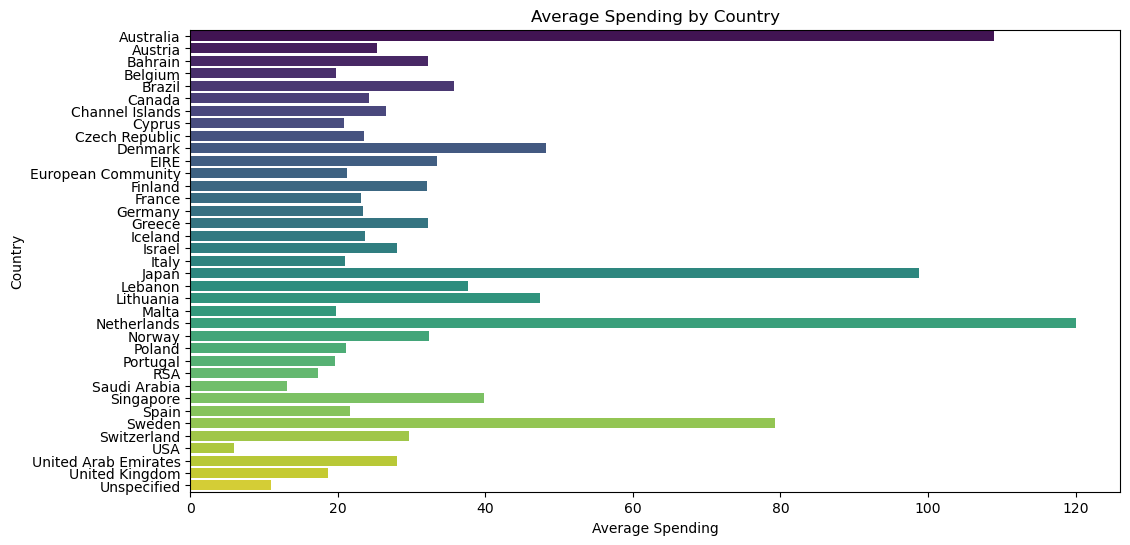

In [108]:
# Plot the average spending by country
plt.figure(figsize=(12, 6))
sns.barplot(x='average_spending', y='Country', data=country_behavior, palette='viridis')
plt.title('Average Spending by Country')
plt.xlabel('Average Spending')
plt.ylabel('Country')
plt.show()

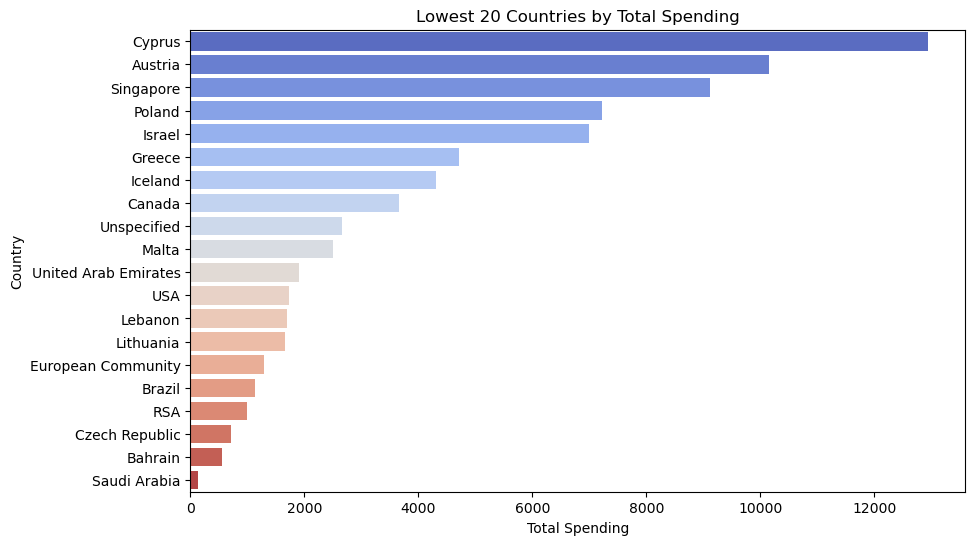

In [110]:
# Plotting Lowest 20 Spending
plt.figure(figsize=(10, 6))
sns.barplot(x='total_spending', y='Country', data=lowest_20_spending, palette='coolwarm')
plt.title('Lowest 20 Countries by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Country')
plt.show()

# Generating and Calculating RFM Values

In [114]:
# Recency: Time since last purchase (most recent date - last purchase date)
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)  
data['Recency'] = (reference_date - data['InvoiceDate']).dt.days
data['Recency']

0         374
1         374
2         374
3         374
4         374
         ... 
541904      1
541905      1
541906      1
541907      1
541908      1
Name: Recency, Length: 406829, dtype: int64

In [116]:
# Frequency: How many times a customer has made a purchase
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()
frequency

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

In [118]:
# Monetary: Total spend for each customer
monetary = data.groupby('CustomerID')['TotalPrice'].sum()
monetary

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: TotalPrice, Length: 4372, dtype: float64

In [120]:
# Generate RFM metrics
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days,
                                     'InvoiceNo': 'count',
                                     'TotalPrice': 'sum'}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [122]:
# Estimate Customer Lifetime Value(CLV)
rfm['CLV'] = rfm['Monetary'] * rfm['Frequency']

In [124]:
# Display the rfm Table
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary        CLV
0     12346.0      326          2      0.00       0.00
1     12347.0        3        182   4310.00  784420.00
2     12348.0       76         31   1797.24   55714.44
3     12349.0       19         73   1757.55  128301.15
4     12350.0      311         17    334.40    5684.80


# Customer Lifetime Value (CLV)
- Customer 12347 has a recency of 3 days, indicating recent engagement.
- Customer 12347 has made 182 purchases, while Customer 12346 has made only 2.
- Customer 12347 generated the highest revenue, at $4,310.00.
- Customer 12347 has the highest CLV at 784,420.00, reflecting high engagement and spending.
- Customers with minimal transactions or spending, like Customer 12346, have a CLV of 0.00.

# Key Insights:
- Customer 12347 stands out as highly valuable with frequent purchases and high monetary contributions.
- Customers like 12346 exhibit very low engagement and spending, contributing little to overall CLV.
- Recency plays a significant role in determining active customers, as seen with lower recency values correlating with higher frequency and monetary contributions.

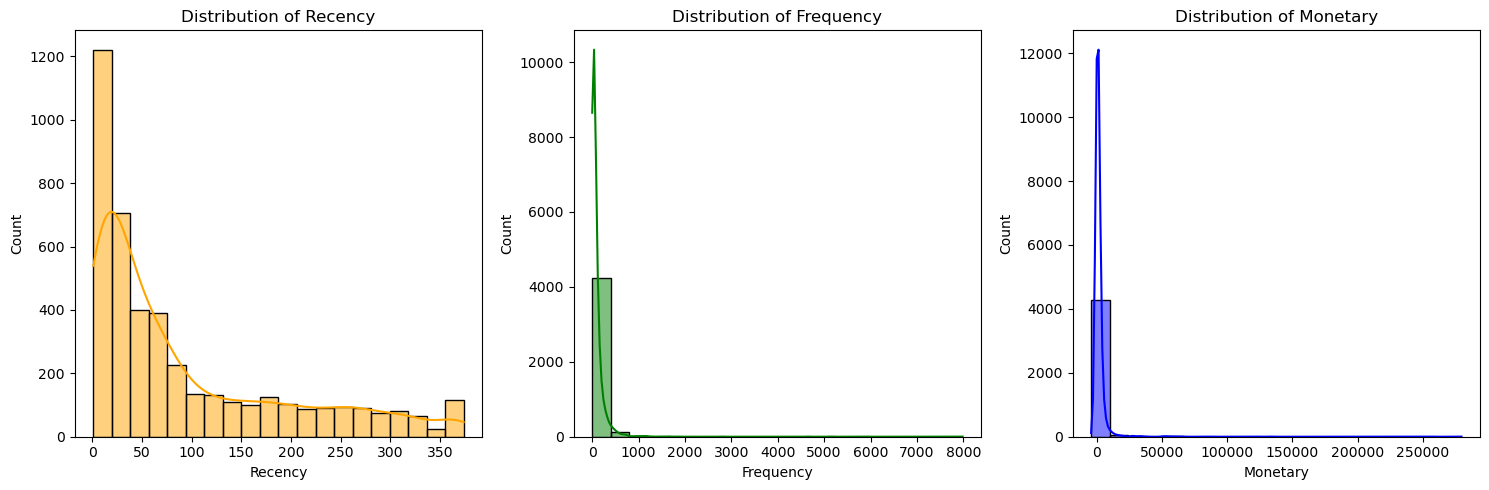

In [127]:
# Univariate Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='orange')
plt.title('Distribution of Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='green')
plt.title('Distribution of Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=20, kde=True, color='blue')
plt.title('Distribution of Monetary')

plt.tight_layout()
plt.show()

# Outlier detection and treatment

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# Outlier Detection using IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)  # 25th percentile
    Q3 = df.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1           # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [134]:
# Outlier detection using IQR for RFM and CLV columns
lower_bound, upper_bound = detect_outliers_iqr(rfm[['Recency', 'Frequency', 'Monetary', 'CLV']])

In [136]:
# Print lower and upper bounds for reference
print(f"Lower Bounds: \n{lower_bound}")
print(f"Upper Bounds: \n{upper_bound}")

Lower Bounds: 
Recency        -173.50000
Frequency      -110.50000
Monetary      -1684.18125
CLV         -209200.91250
dtype: float64
Upper Bounds: 
Recency         334.50000
Frequency       229.50000
Monetary       3589.26875
CLV          362696.42750
dtype: float64


# The calculated lower and upper bounds for the RFM and CLV columns are:

- Recency:
  - Lower Bound: -172
  - Upper Bound: 332

- Frequency:
  - Lower Bound: -110.5
  - Upper Bound: 229.5

- Monetary:
  - Lower Bound: -1684.18
  - Upper Bound: 3589.27

- CLV:
  - Lower Bound: -209020.91
  - Upper Bound: 362696.43

In [139]:
# Count outliers for Recency
recency_outliers = rfm[(rfm['Recency'] < lower_bound['Recency']) | (rfm['Recency'] > upper_bound['Recency'])]

# Count outliers for Frequency
frequency_outliers = rfm[(rfm['Frequency'] < lower_bound['Frequency']) | (rfm['Frequency'] > upper_bound['Frequency'])]

# Count outliers for Monetary
monetary_outliers = rfm[(rfm['Monetary'] < lower_bound['Monetary']) | (rfm['Monetary'] > upper_bound['Monetary'])]

# Count outliers for CLV
clv_outliers = rfm[(rfm['CLV'] < lower_bound['CLV']) | (rfm['CLV'] > upper_bound['CLV'])]

In [141]:
# Display the number of outliers for each column
print(f"Outliers in Recency: {recency_outliers.shape[0]}")
print(f"Outliers in Frequency: {frequency_outliers.shape[0]}")
print(f"Outliers in Monetary: {monetary_outliers.shape[0]}")
print(f"Outliers in CLV: {clv_outliers.shape[0]}")

Outliers in Recency: 143
Outliers in Frequency: 380
Outliers in Monetary: 423
Outliers in CLV: 662


- There are a significant number of outliers in the dataset for each of the analyzed metrics (Recency, Frequency, Monetary, and CLV).
- The column with the most outliers is CLV (Customer Lifetime Value) with 662 outliers, indicating a broad spread in customer value data.
- Monetary has the second-highest number of outliers (423), followed by Frequency (380).
- Recency has relatively fewer outliers (149), but they may still have a notable impact on the analysis.

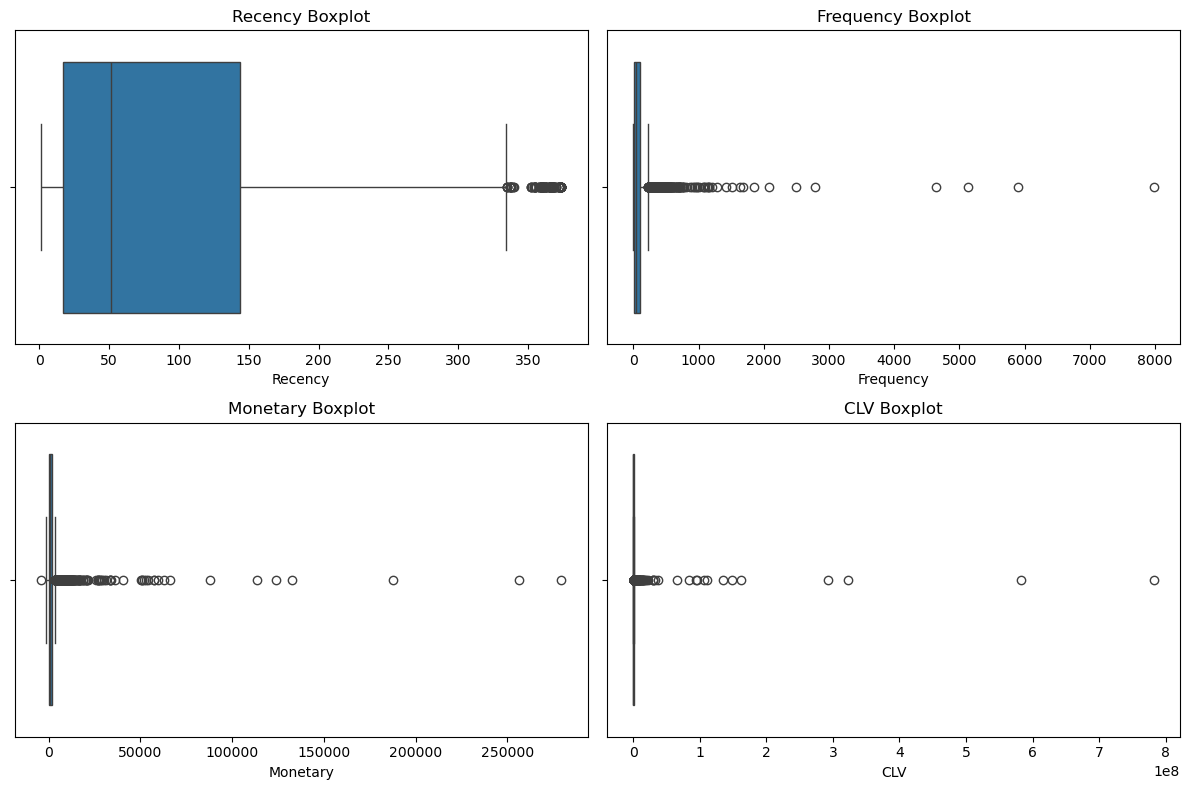

In [144]:
# Plotting Boxplots to visualize the outliers
plt.figure(figsize=(12, 8))

# Recency boxplot
plt.subplot(2, 2, 1)
sns.boxplot(data=rfm, x='Recency')
plt.title('Recency Boxplot')

# Frequency boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data=rfm, x='Frequency')
plt.title('Frequency Boxplot')

# Monetary boxplot
plt.subplot(2, 2, 3)
sns.boxplot(data=rfm, x='Monetary')
plt.title('Monetary Boxplot')

# CLV boxplot
plt.subplot(2, 2, 4)
sns.boxplot(data=rfm, x='CLV')
plt.title('CLV Boxplot')

plt.tight_layout()
plt.show()

In [146]:
# Remove outliers for each column by filtering values within the bounds
rfm_cleaned = rfm[
    (rfm['Recency'] >= lower_bound['Recency']) & (rfm['Recency'] <= upper_bound['Recency']) &
    (rfm['Frequency'] >= lower_bound['Frequency']) & (rfm['Frequency'] <= upper_bound['Frequency']) &
    (rfm['Monetary'] >= lower_bound['Monetary']) & (rfm['Monetary'] <= upper_bound['Monetary']) &
    (rfm['CLV'] >= lower_bound['CLV']) & (rfm['CLV'] <= upper_bound['CLV'])]

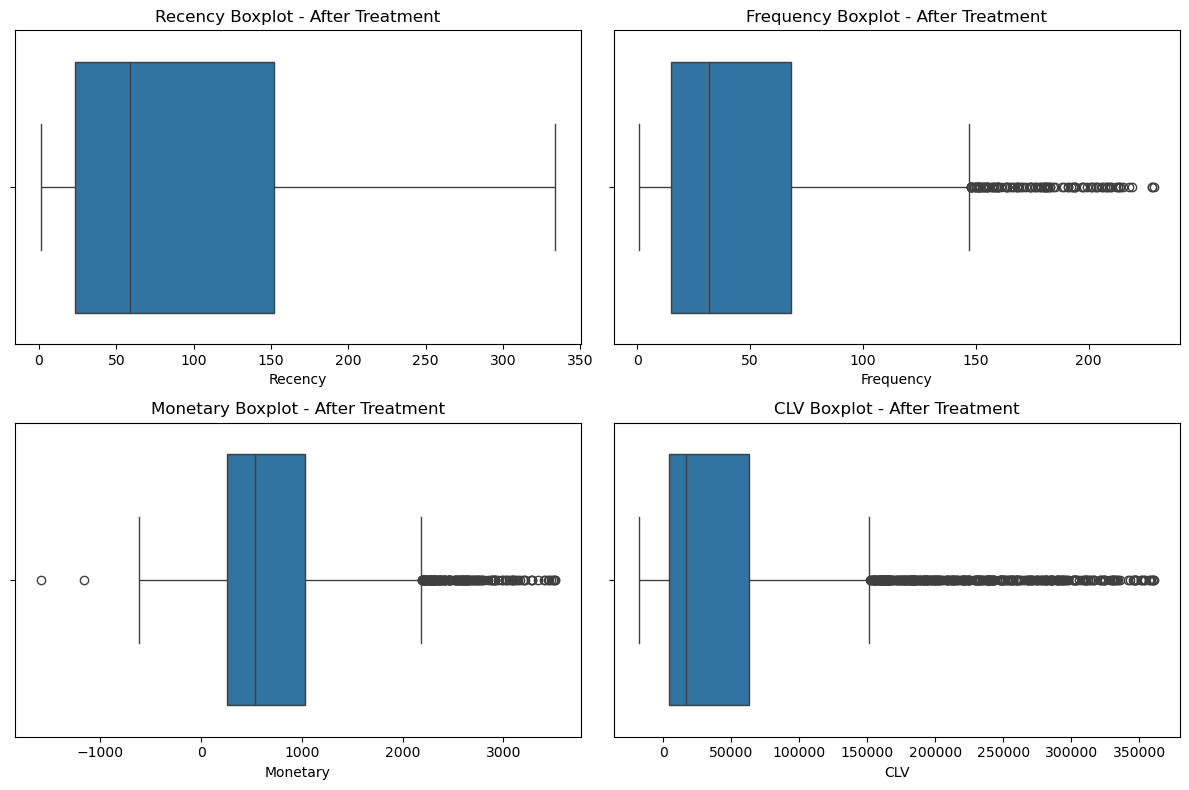

In [148]:
# Now plot after treating outliers
plt.figure(figsize=(12, 8))

# Recency after treatment
plt.subplot(2, 2, 1)
sns.boxplot(data=rfm_cleaned, x='Recency')
plt.title('Recency Boxplot - After Treatment')

# Frequency after treatment
plt.subplot(2, 2, 2)
sns.boxplot(data=rfm_cleaned, x='Frequency')
plt.title('Frequency Boxplot - After Treatment')

# Monetary after treatment
plt.subplot(2, 2, 3)
sns.boxplot(data=rfm_cleaned, x='Monetary')
plt.title('Monetary Boxplot - After Treatment')

# CLV after treatment
plt.subplot(2, 2, 4)
sns.boxplot(data=rfm_cleaned, x='CLV')
plt.title('CLV Boxplot - After Treatment')

plt.tight_layout()
plt.show()

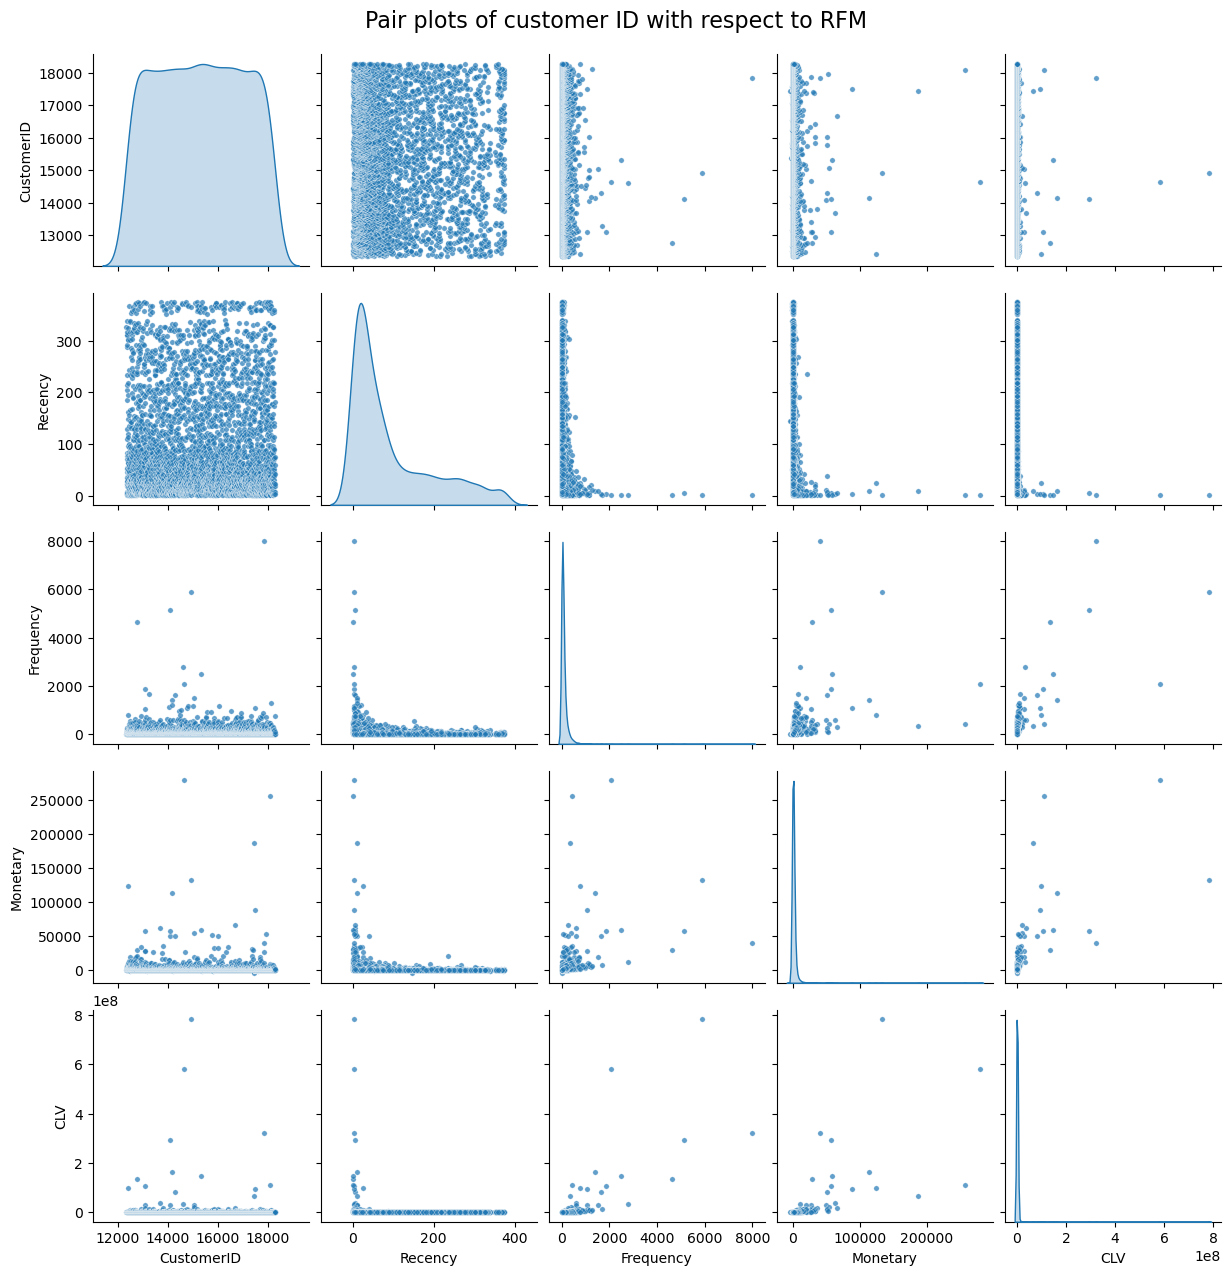

In [150]:
# CustomerID and RFM columns for the pair plot
rfm_subset = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'CLV']]
sns.pairplot(rfm_subset, diag_kind='kde', corner=False, plot_kws={'alpha': 0.7, 's': 15}, diag_kws={'shade': True})
plt.suptitle("Pair plots of customer ID with respect to RFM", y=1.02, fontsize=16)
plt.show()

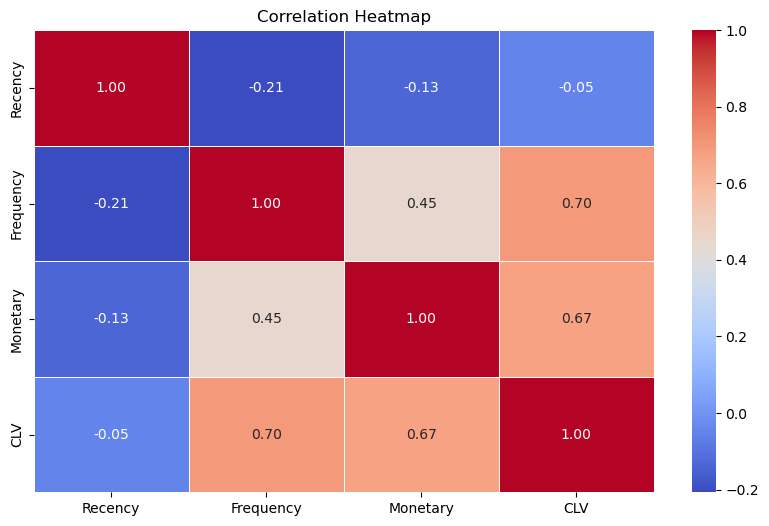

In [152]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary', 'CLV']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- There is negative correlation between CLV and Recency
- There is positive correlation between Monetary and CLv
- Frequency and monetary are moderately related

# 5.Modeling

# K Means Clustering

In [157]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [159]:
# Standardize the RFM metrics for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary','CLV']])

In [161]:
# Elbow method to find the optimal number of clusters
inertia = []
range_n_clusters = range(2, 11)

In [163]:
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

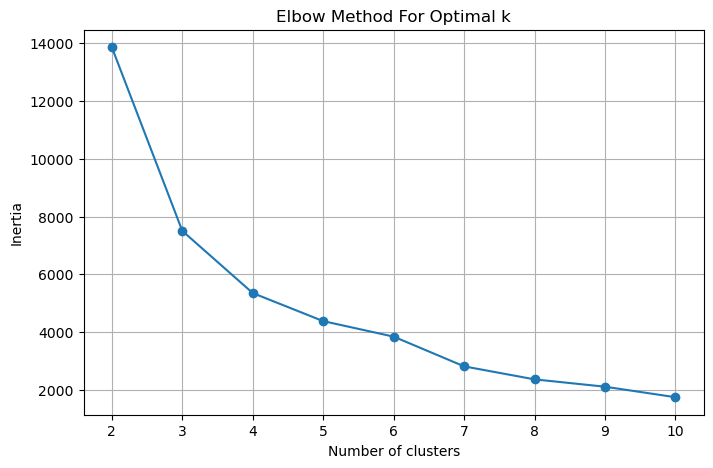

In [165]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [167]:
# Silhouette analysis for the same range of clusters
silhouette_scores = {}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    silhouette_scores[n_clusters] = silhouette_score(rfm_scaled, cluster_labels)

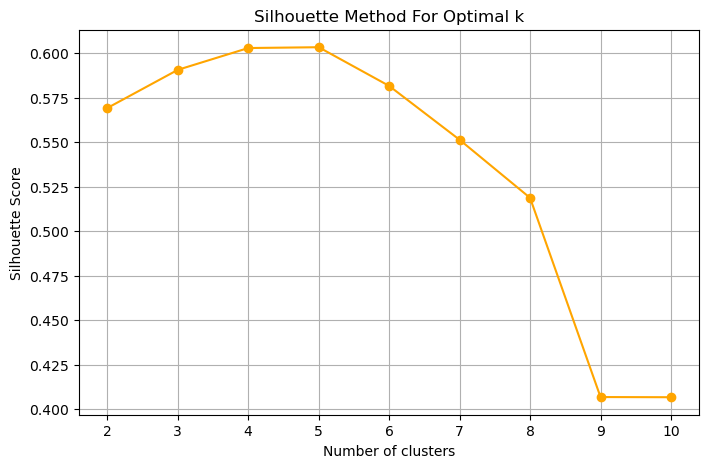

In [168]:
# Plot Silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, list(silhouette_scores.values()), marker='o', color='orange')
plt.title('Silhouette Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [169]:
# Choose optimal clusters, e.g., k = 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster']= kmeans.fit_predict(rfm_scaled)
rfm['Cluster']

0       1
1       0
2       0
3       0
4       1
       ..
4367    1
4368    1
4369    0
4370    0
4371    0
Name: Cluster, Length: 4372, dtype: int32

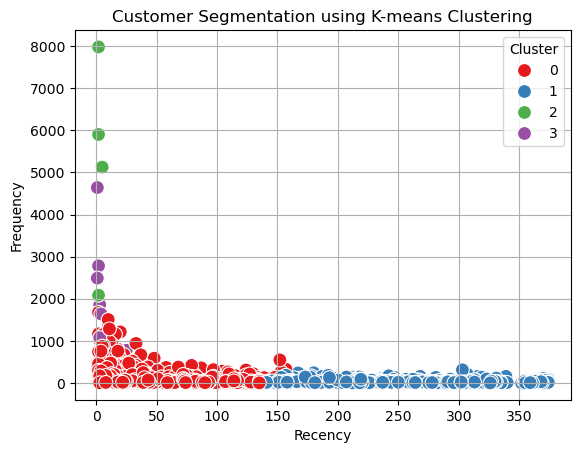

In [171]:
# Visualize the clusters
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='Set1', s=100)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [175]:
# RFM Segmentation Summary
rfm_summary = rfm.groupby('CustomerID').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max']})
print(rfm_summary)

           Recency           Frequency           Monetary                  
              mean  min  max      mean  min  max     mean      min      max
CustomerID                                                                 
12346.0      326.0  326  326       2.0    2    2     0.00     0.00     0.00
12347.0        3.0    3    3     182.0  182  182  4310.00  4310.00  4310.00
12348.0       76.0   76   76      31.0   31   31  1797.24  1797.24  1797.24
12349.0       19.0   19   19      73.0   73   73  1757.55  1757.55  1757.55
12350.0      311.0  311  311      17.0   17   17   334.40   334.40   334.40
...            ...  ...  ...       ...  ...  ...      ...      ...      ...
18280.0      278.0  278  278      10.0   10   10   180.60   180.60   180.60
18281.0      181.0  181  181       7.0    7    7    80.82    80.82    80.82
18282.0        8.0    8    8      13.0   13   13   176.60   176.60   176.60
18283.0        4.0    4    4     756.0  756  756  2094.88  2094.88  2094.88
18287.0     

# Hierarchical Clustering

In [178]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [180]:
# Perform linkage (Agglomerative clustering method)
linked = linkage(rfm_scaled, method='ward')

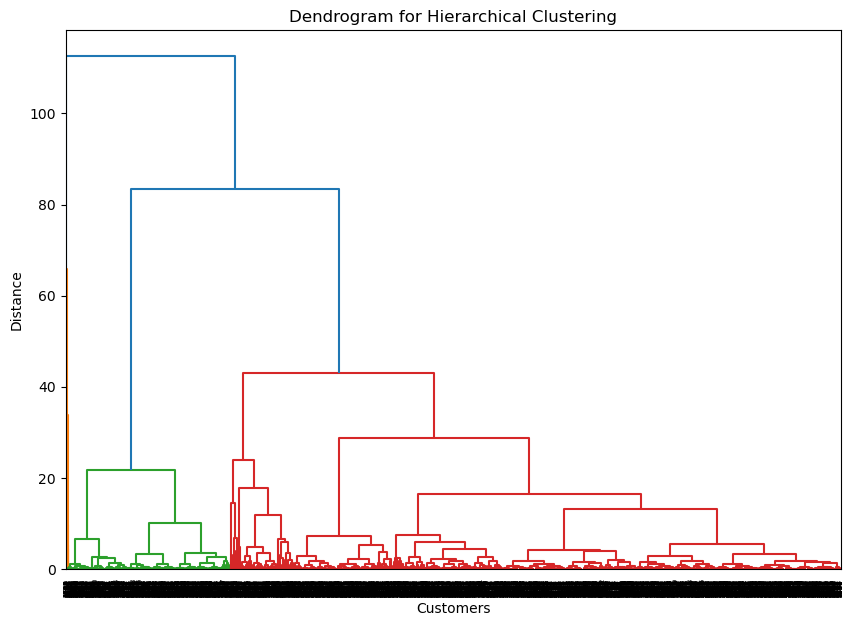

In [182]:
# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [184]:
# Create and fit the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rfm['Cluster_Hierarchical'] = agg_clustering.fit_predict(rfm_scaled)

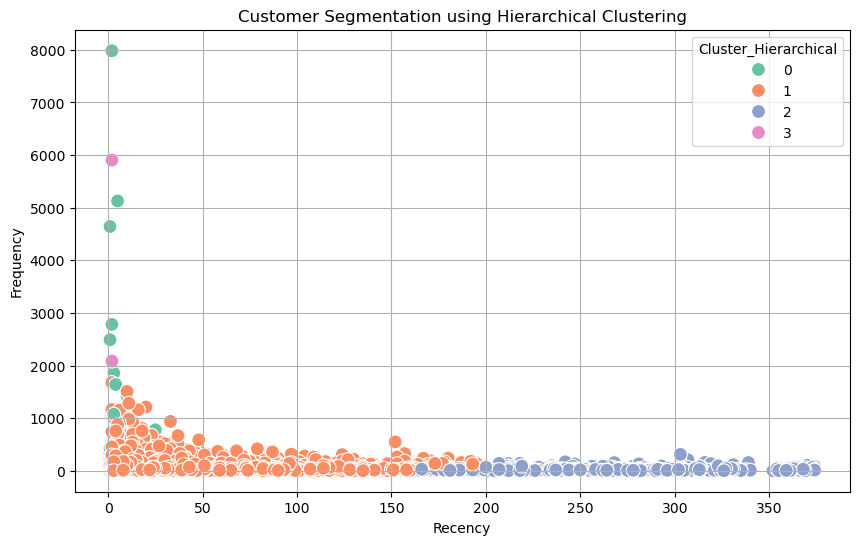

In [185]:
# Hierarchical Clustering Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster_Hierarchical', data=rfm, palette='Set2', s=100)
plt.title('Customer Segmentation using Hierarchical Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [188]:
# RFM Segmentation Summary for Hierarchical Clustering
rfm_summary_hierarchical = rfm.groupby('Cluster_Hierarchical').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max']})
print(rfm_summary_hierarchical)

                         Recency              Frequency              \
                            mean  min  max         mean   min   max   
Cluster_Hierarchical                                                  
0                       5.500000    1   25  2548.416667   351  7983   
1                      47.091226    1  236   100.834108     1  1677   
2                     264.854803  164  374    23.132096     1   312   
3                       2.000000    2    2  3994.000000  2085  5903   

                           Monetary                        
                               mean        min        max  
Cluster_Hierarchical                                       
0                      89589.244167   11713.85  256438.49  
1                       1874.973749   -4287.63   65892.08  
2                        392.220088   -1192.20    7741.47  
3                     206030.820000  132572.62  279489.02  


In [190]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering

In [193]:
# DBSCAN clustering requires tuning of parameters: eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)  
rfm['Cluster_DBSCAN'] = dbscan.fit_predict(rfm_scaled)

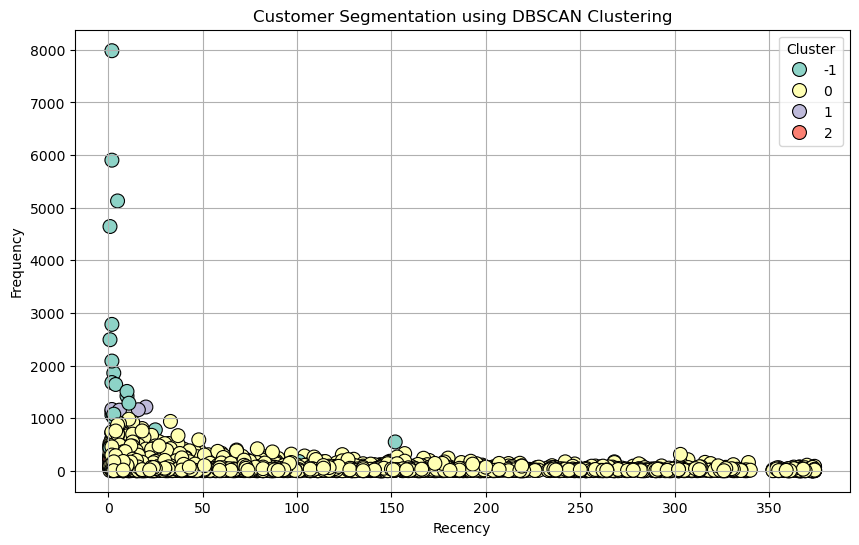

In [195]:
# Visualize DBSCAN Clusters
# DBSCAN assigns a label of -1 for noise points, so we need to handle it differently in visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster_DBSCAN', data=rfm, palette='Set3', s=100, marker="o", edgecolor='black')
plt.title('Customer Segmentation using DBSCAN Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [197]:
# RFM Segmentation Summary for DBSCAN Clusters
rfm_summary_dbscan = rfm.groupby('Cluster_DBSCAN').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max']
})

print(rfm_summary_dbscan)

                  Recency             Frequency                  Monetary  \
                     mean min  max         mean   min   max          mean   
Cluster_DBSCAN                                                              
-1              28.951220   1  268  1260.804878    15  7983  55314.714390   
 0              93.399306   1  374    80.411574     1   981   1348.192105   
 1               8.166667   2   20  1151.833333  1094  1212   7698.651667   
 2               8.800000   1   22   169.400000   102   224  32356.144000   

                                     
                     min        max  
Cluster_DBSCAN                       
-1               1944.32  279489.02  
 0              -4287.63   21024.01  
 1               4678.30   10641.60  
 2              30300.82   33462.81  


# Model Training and Prediction

In [200]:
# Prepare for model training

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [204]:
target = 'Cluster'

In [206]:
# Create features and target
X = rfm_scaled  # Features
y = rfm.groupby('CustomerID')[target].first().values

In [208]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predictions on training data

In [222]:
# Logistic Regression
log_reg_train_preds = log_reg.predict(X_train)  
log_reg_train_acc = accuracy_score(y_train, log_reg_train_preds)

In [224]:
# Decision Tree
dt_train_preds = dt.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_preds)

In [226]:
# Random Forest
rf_train_preds = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_preds)

In [228]:
# Support Vector Machine (SVM)
svm_train_preds = svm.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train_preds)

In [230]:
print("Logistic Regression Training Accuracy:", log_reg_train_acc)
print("Decision Tree Training Accuracy:", dt_train_acc)
print("Random Forest Training Accuracy:", rf_train_acc)
print("SVM Training Accuracy:", svm_train_acc)

Logistic Regression Training Accuracy: 0.9986928104575163
Decision Tree Training Accuracy: 1.0
Random Forest Training Accuracy: 1.0
SVM Training Accuracy: 0.9990196078431373


In [232]:
# Decision Tree Visualization

In [234]:
if hasattr(rfm_scaled, "columns"):
    feature_names = rfm_scaled.columns
else:
    feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]

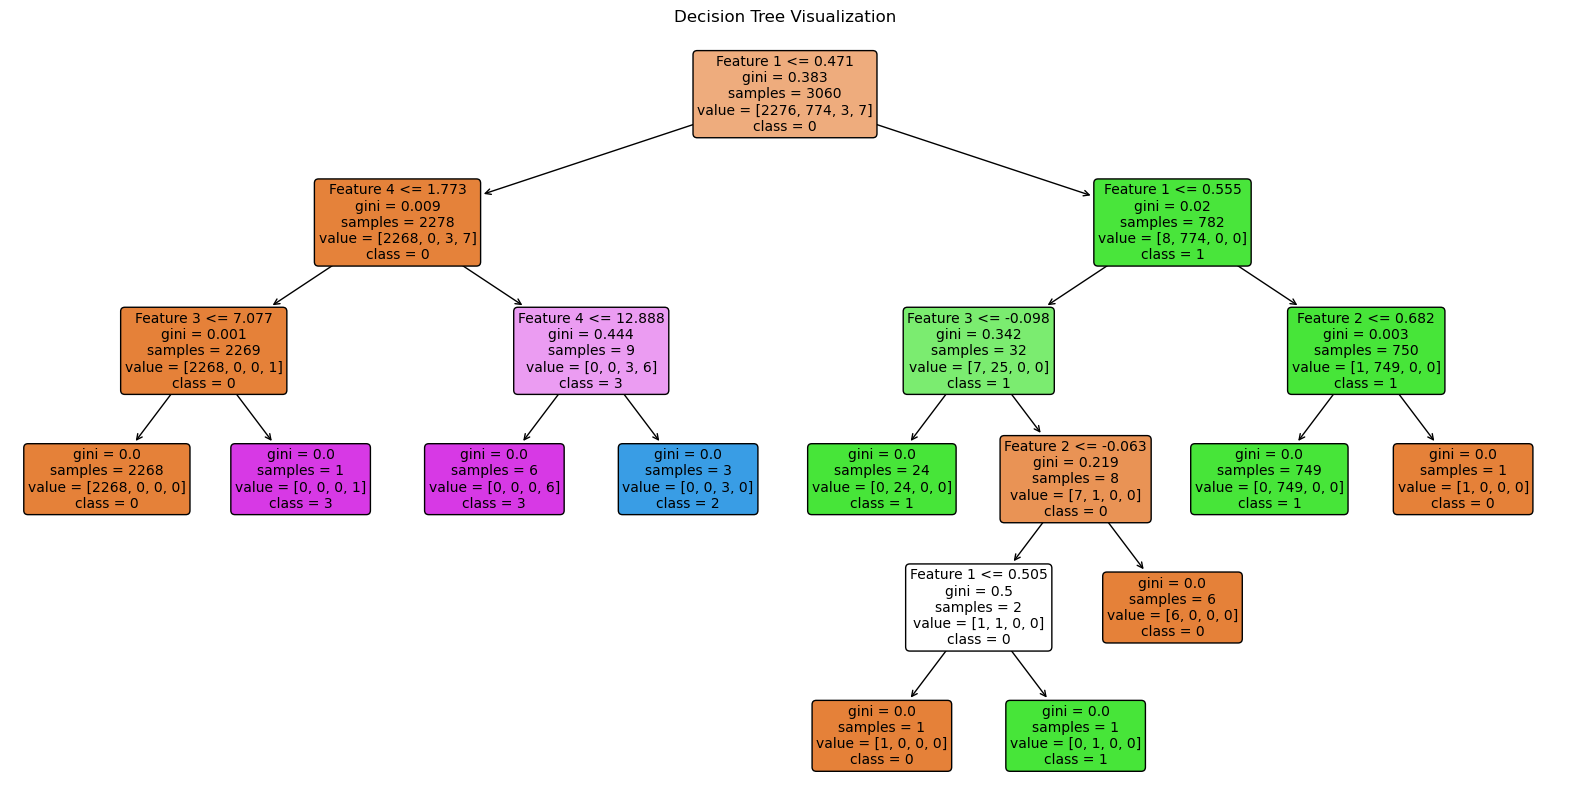

In [236]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  
plot_tree(
    dt,  
    feature_names=feature_names,  
    class_names=[str(cls) for cls in np.unique(y)],  
    filled=True,  
    rounded=True,  
    fontsize=10 
)
plt.title("Decision Tree Visualization")
plt.show()

# Prediction On Test Data

In [211]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

In [213]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

In [215]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [217]:
# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [219]:
# Evaluate the models
print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_preds))
print("Decision Tree Accuracy: ", accuracy_score(y_test, dt_preds))
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_preds))
print("SVM Accuracy: ", accuracy_score(y_test, svm_preds))

Logistic Regression Accuracy:  0.9969512195121951
Decision Tree Accuracy:  0.9977134146341463
Random Forest Accuracy:  0.9977134146341463
SVM Accuracy:  0.9969512195121951


# Classification Reports

In [239]:
# Print Classification Reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_preds))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       0.99      1.00      0.99       325
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



In [241]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_preds))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      0.99      1.00       325
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



In [243]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       0.99      1.00      1.00       325
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



In [245]:
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_preds))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       0.99      1.00      1.00       325
           2       0.00      0.00      0.00         1
           3       0.83      1.00      0.91         5

    accuracy                           1.00      1312
   macro avg       0.71      0.75      0.73      1312
weighted avg       1.00      1.00      1.00      1312



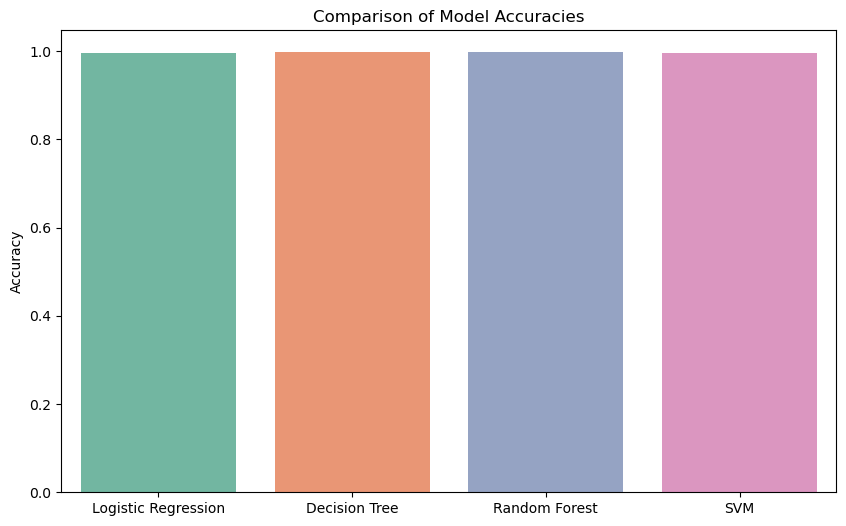

In [247]:
# Visualize the comparison of models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, log_reg_preds),
    accuracy_score(y_test, dt_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, svm_preds)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

# Confusion Matrices

In [250]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

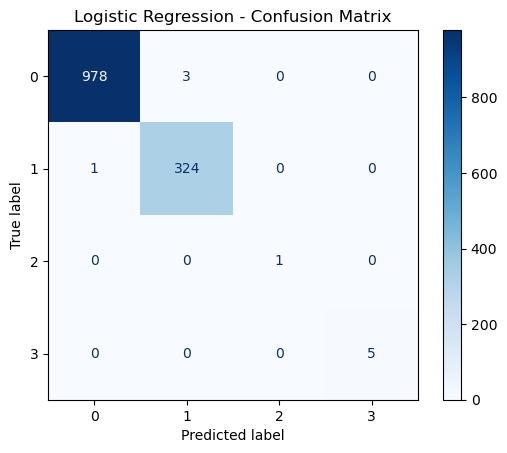

In [252]:
# Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
ConfusionMatrixDisplay(confusion_matrix=log_reg_cm, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

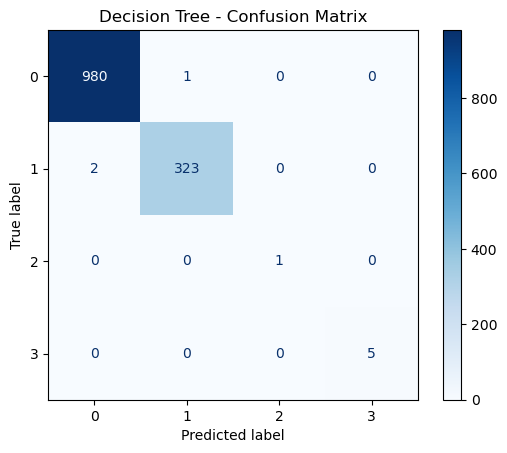

In [254]:
# Decision Tree
dt_cm = confusion_matrix(y_test, dt_preds)
ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

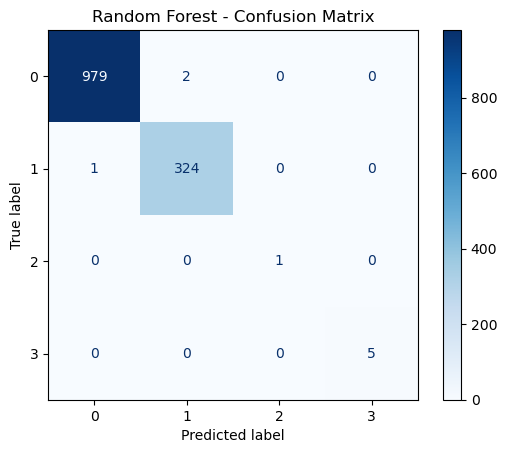

In [256]:
# Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.show()

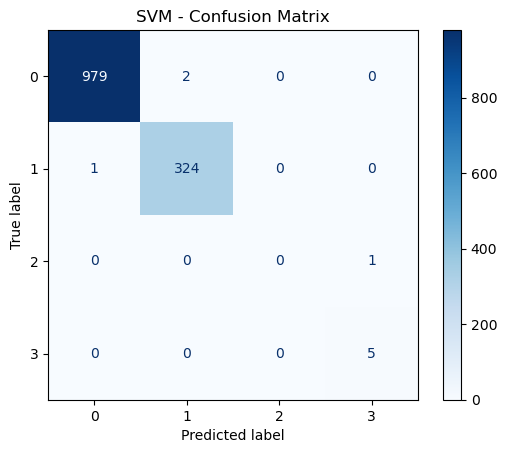

In [258]:
# Support Vector Machine (SVM)
svm_cm = confusion_matrix(y_test, svm_preds)
ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title('SVM - Confusion Matrix')
plt.show()

In [262]:
import pickle

# Save the trained Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(data, file)
print("Model saved as decision_tree_model.pkl")

Model saved as decision_tree_model.pkl
